In [7]:
import numpy as np
import pandas as pd
from scipy import stats
import sys
import argparse
import h5py
from scipy.stats import t as student_t
from statsmodels.stats import multitest as mt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import gaussian_kde
sns.set()

from matplotlib.colors import Normalize
from matplotlib import cm

In [8]:
vars_df_A = pd.read_pickle('female_vars.pkl')
vars_df_B = pd.read_pickle('female_vars.pkl')

varsHeader = np.loadtxt("../Analsysis Female New/varsHeader.txt", dtype=str, delimiter='\n')
vars_categories = np.loadtxt("../Analsysis Female New/vars_categories.txt", dtype=str, delimiter='\n')

In [9]:
vars_df_A.iloc[0].dataframe

,idx,names,Categories,pearson_r,t_test_statistic,p_values_corrected,p_values,abs_pearson_r,log_p_values,log_p_values_corrected
0,0,Ethnic background (0.0),Ethnic Background,-0.017822,1.261440,0.879211,0.207209,0.017822,0.683591,5.590694e-02
1,1,Ethnic background (1.0),Ethnic Background,-0.013354,0.386143,1.000000,0.699489,0.013354,0.155219,4.821637e-17
2,2,Ethnic background (2.0),Ethnic Background,-0.023751,0.896215,0.970520,0.370290,0.023751,0.431459,1.299556e-02
3,3,Genotype measurement batch (0.0),Genetic Markers,-0.004550,0.317799,1.000000,0.750651,0.004550,0.124562,4.821637e-17
4,4,Heterozygosity (0.0),Genetic Markers,-0.008424,0.588403,1.000000,0.556289,0.008424,0.254699,4.821637e-17
...,...,...,...,...,...,...,...,...,...,...
13804,17507,Manifestations of mania or irritability (0.1),Mental Health,-0.003324,0.084152,1.000000,0.932962,0.003324,0.030136,4.821637e-17
13805,17514,Substances taken for anxiety (0.1),Mental Health,-0.004316,0.113373,1.000000,0.909768,0.004316,0.041069,4.821637e-17
13806,17516,Activities undertaken to treat anxiety (0.1),Mental Health,-0.068728,1.780529,0.739522,0.075444,0.068728,1.122376,1.310486e-01
13807,17525,Ever been offered/sought treatment for anxiety...,Mental Health,0.005244,0.331269,1.000000,0.740459,0.005244,0.130499,4.821637e-17


In [10]:
vars_df_A.drop([1,2,3], inplace=True)
vars_df_B.drop([0], inplace=True)

In [11]:
vars_df_A

,modality,bonf,fdr,dataframe
0,T1L_large_HGL,5.441192,3.425256,idx ...


In [12]:
vars_df_A.iloc[0].dataframe['z'] = np.multiply(np.sign(vars_df_A.iloc[0].dataframe['pearson_r']), vars_df_A.iloc[0].dataframe['log_p_values'])

for idx in range(len(vars_df_B)):
    vars_df_B.iloc[idx].dataframe['z'] = np.multiply(np.sign(vars_df_B.iloc[idx].dataframe['pearson_r']), vars_df_B.iloc[idx].dataframe['log_p_values'])
    

In [13]:
vars_df_A.iloc[0].dataframe

,idx,names,Categories,pearson_r,t_test_statistic,p_values_corrected,p_values,abs_pearson_r,log_p_values,log_p_values_corrected,z
0,0,Ethnic background (0.0),Ethnic Background,-0.017822,1.261440,0.879211,0.207209,0.017822,0.683591,5.590694e-02,-0.683591
1,1,Ethnic background (1.0),Ethnic Background,-0.013354,0.386143,1.000000,0.699489,0.013354,0.155219,4.821637e-17,-0.155219
2,2,Ethnic background (2.0),Ethnic Background,-0.023751,0.896215,0.970520,0.370290,0.023751,0.431459,1.299556e-02,-0.431459
3,3,Genotype measurement batch (0.0),Genetic Markers,-0.004550,0.317799,1.000000,0.750651,0.004550,0.124562,4.821637e-17,-0.124562
4,4,Heterozygosity (0.0),Genetic Markers,-0.008424,0.588403,1.000000,0.556289,0.008424,0.254699,4.821637e-17,-0.254699
...,...,...,...,...,...,...,...,...,...,...,...
13804,17507,Manifestations of mania or irritability (0.1),Mental Health,-0.003324,0.084152,1.000000,0.932962,0.003324,0.030136,4.821637e-17,-0.030136
13805,17514,Substances taken for anxiety (0.1),Mental Health,-0.004316,0.113373,1.000000,0.909768,0.004316,0.041069,4.821637e-17,-0.041069
13806,17516,Activities undertaken to treat anxiety (0.1),Mental Health,-0.068728,1.780529,0.739522,0.075444,0.068728,1.122376,1.310486e-01,-1.122376
13807,17525,Ever been offered/sought treatment for anxiety...,Mental Health,0.005244,0.331269,1.000000,0.740459,0.005244,0.130499,4.821637e-17,0.130499


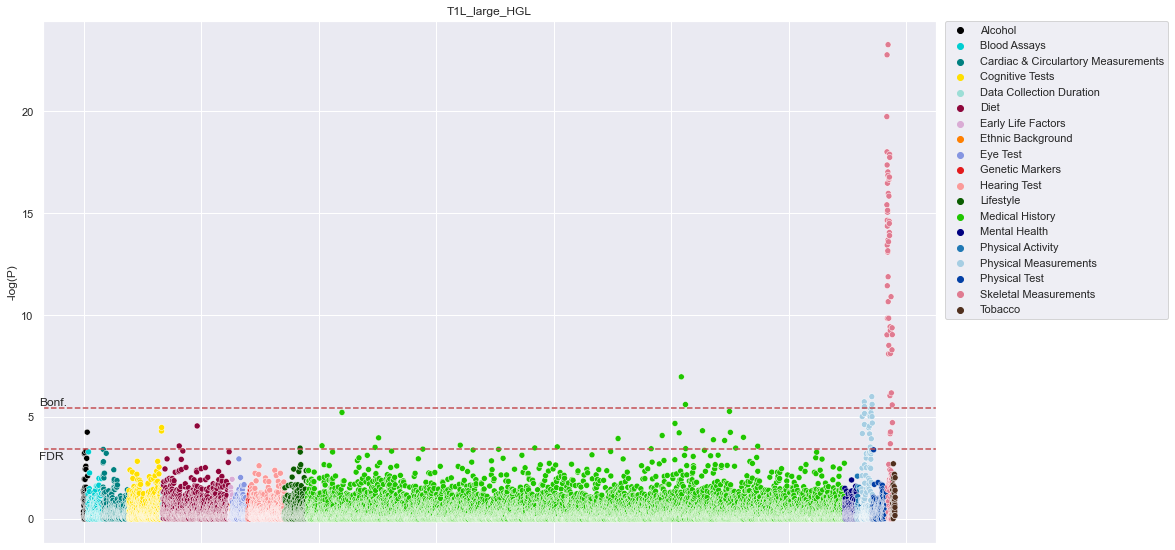

In [14]:
corr_df = vars_df_A.iloc[0].dataframe
colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6','#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c','#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4','#a6cee3', '#023fa5', '#e07b91', '#50301e']
bonferroni_threshold = vars_df_A.iloc[0].bonf
false_discovery_rate = vars_df_A.iloc[0].fdr
x_text_location = -750
bonferroni_threshold_text = 0.1
false_discovery_rate_text = -0.5
title = vars_df_A.iloc[0].modality

plt.figure(figsize=(16, 9.6))
sns.scatterplot(data=corr_df.sort_values('Categories'), x=np.arange(0,len(corr_df)), 
            y='log_p_values', hue='Categories', palette=colorCycle)  

plt.ylabel('-log(P)')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.axhline(y = bonferroni_threshold, linestyle='--', color='r')
plt.text(x=x_text_location, y=bonferroni_threshold + bonferroni_threshold_text, s='Bonf.')
if false_discovery_rate is not None:
    plt.axhline(y = false_discovery_rate, linestyle='--', color='r')
    plt.text(x=x_text_location, y=false_discovery_rate + false_discovery_rate_text, s='FDR')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.title(title)
plt.show()

In [15]:
def bland_altman_plot(df, modality, metric, heatmap=False, bonf=None, fdr=None):
    if metric == '-log(P)':
        colData1 = 'log_p_values_x'
        colData2 = 'log_p_values_y'
    elif metric == 'Pearson R':
        colData1 = 'pearson_r_x'
        colData2 = 'pearson_r_y'
    elif metric == 'Pearson R Abs':
        colData1 = 'abs_pearson_r_x'
        colData2 = 'abs_pearson_r_y'
    elif metric == 'z':
        colData1 = 'z_x'
        colData2 = 'z_y'
    else:
        return
    data1     = df[colData1].to_numpy()
    data2     = df[colData2].to_numpy()
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd
    CI_perc = len(np.where((diff>=CI_low) & (diff <= CI_high))[0]) / len(diff)
    CI_perc = round(CI_perc, 3) * 100

    plt.figure(figsize=(9.6, 7.2))
    
    if heatmap == False:
        colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6','#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c','#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4','#a6cee3', '#023fa5', '#e07b91', '#50301e']
        sns.scatterplot(data=df, x=mean, y=diff, hue='Categories_x', palette=colorCycle)
    else:
        sns.set_style("darkgrid", {'image.cmap': u'plasma'})
        x = mean
        y = diff
        xy = np.vstack((x,y))
        z = gaussian_kde(xy)
        z = z.evaluate(xy)

        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]
        plt.scatter(x,y,c=z)
        
    plt.axhline(md,           color='gray', linestyle='--', alpha=0.5)
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--', alpha=0.5)
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--', alpha=0.5)
    if bonf is not None:
        plt.axvline(bonf, color='red', linestyle='--', alpha=0.5)
        plt.text(x=bonf, y=min(diff), s='Bonf.')
    if fdr is not None:
        plt.axvline(fdr, color='red', linestyle='--', alpha=0.5)
        plt.text(x=fdr, y=min(diff), s='FDR.')
    
    xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.14
    
    plt.text(xOutPlot, md - 1.96*sd, 
        r'-1.96SD:' + "\n" + "%.2f" % CI_low, 
        ha = "center",
        va = "center",
        )
    plt.text(xOutPlot, md + 1.96*sd, 
        r'+1.96SD:' + "\n" + "%.2f" % CI_high, 
        ha = "center",
        va = "center",
        )
    plt.text(xOutPlot, md, 
        r'Mean:' + "\n" + "%.2f" % md, 
        ha = "center",
        va = "center",
        )
    
    title = 'Bland-Altman Plot: ' + modality
    xlabel = metric + ' Means'
    ylabel = metric + ' Differences'
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    if heatmap==False:
        plt.plot([],[],' ',label= str(CI_perc) + '%')
        plt.legend(bbox_to_anchor=(1.21, 1), loc=2, borderaxespad=0.)
    
    
def scatter_plot_heatmap(x, y, xlabel, ylabel, title, equality_line=True, set_scale=False, kde=True, annotate=False, resolution_lim=False):
    
    if isinstance(x, np.ndarray ):
        pass
    else:
        x = x.to_numpy()
        y = y.to_numpy()
    
    fig = plt.figure(figsize=[7.2, 7.2])
    if kde == True:
        sns.set_style("darkgrid", {'image.cmap': u'plasma'})
        xy = np.vstack([x,y])
        z = gaussian_kde(xy)(xy)
        # Sort the points by density, so that the densest points are plotted last
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]
        plt.scatter(x,y,c=z,s=50)
    else:
        plt.scatter(x,y)
    
    if equality_line == True:
        plt.plot(x, x, ls="-", color = sns.xkcd_rgb['black'], label='Equality Line') #this is just the line of equality
    
    X_mat=np.vstack((np.ones(len(x)), x)).T
    beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)
    b,w = beta_hat[0],beta_hat[1]
    x2 = np.linspace(np.min(x),np.max(x),num=10)
    y2 = w * x2 + b
    plt.plot(x2,y2,ls='--', color= sns.xkcd_rgb['red'], label='Linear Regression Line')
    
    pearson_correlation = pearsonr(x,y)[0]
    
    if annotate == True:
        if set_scale == True:
            x_min, x_max = np.min(x), np.max(x)
            y_min, y_max = np.min(y), np.max(y)
            c_min, c_max = min(x_min, y_min), max(x_max, y_max)
            plt.xlim([c_min-2, c_max+2])
            plt.ylim([c_min-2, c_max+2])

        plt.xlabel(xlabel)
        plt.ylabel(ylabel)

        lbl = 'Pearson R = '+str(round(pearson_correlation,3))
        plt.plot([],[],' ',label=lbl)

        plt.title(title)
        plt.legend()
        
    if resolution_lim == True:
        plt.xlim([-resolution*.01, resolution])
        plt.ylim([-resolution*.01, resolution])
#     plt.text(np.max(x), np.min(y)+0.05*np.abs(np.min(y2)), 'R='+str(round(pearson_correlation,3)), horizontalalignment='right', fontsize='large')

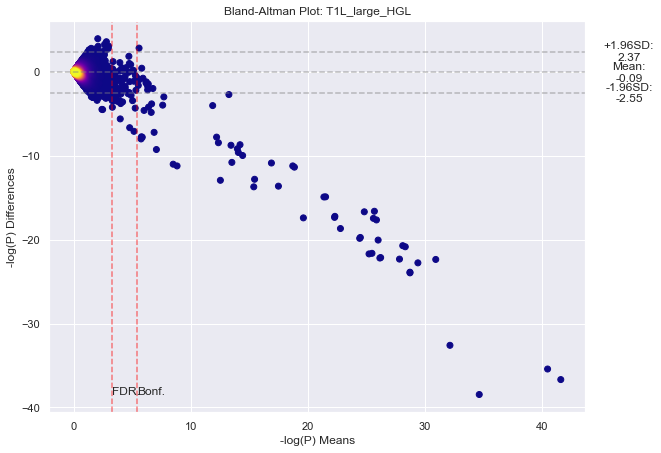

In [9]:
idx=0
dfA = vars_df_A.iloc[idx].dataframe
dfB = vars_df_B.iloc[idx].dataframe
bonf = (vars_df_A.iloc[idx].bonf + vars_df_B.iloc[idx].bonf) / 2
fdr = (vars_df_A.iloc[idx].fdr + vars_df_B.iloc[idx].fdr) / 2
modality = vars_df_A.iloc[idx].modality
dfm = pd.merge(dfA, dfB, on='idx', how='inner')
bland_altman_plot(df = dfm.sort_values('Categories_x'), modality = modality, metric='-log(P)', heatmap=True, 
                  bonf=bonf, fdr=fdr
                 )

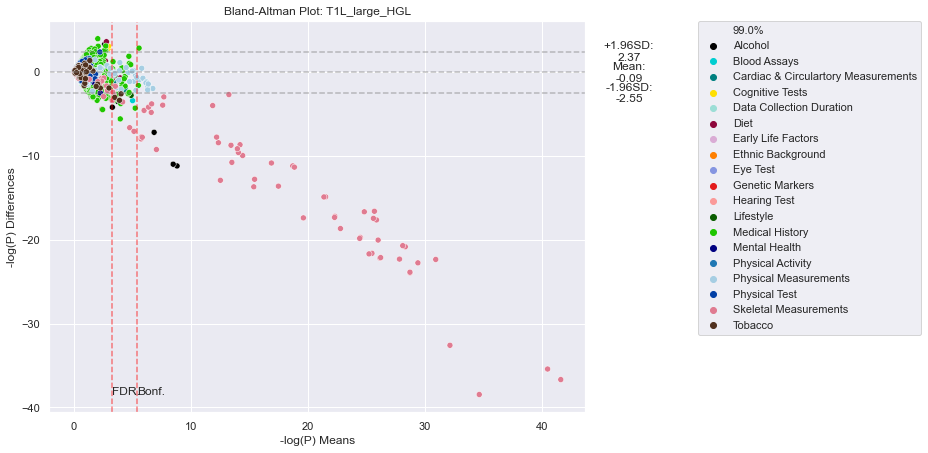

In [10]:
idx=0
dfA = vars_df_A.iloc[idx].dataframe
dfB = vars_df_B.iloc[idx].dataframe
modality = vars_df_A.iloc[idx].modality
dfm = pd.merge(dfA, dfB, on='idx', how='inner')
bonf = (vars_df_A.iloc[idx].bonf + vars_df_B.iloc[idx].bonf) / 2
fdr = (vars_df_A.iloc[idx].fdr + vars_df_B.iloc[idx].fdr) / 2
bland_altman_plot(dfm.sort_values('Categories_x'), modality = modality, metric='-log(P)',
                 bonf=bonf, fdr=fdr
                 )

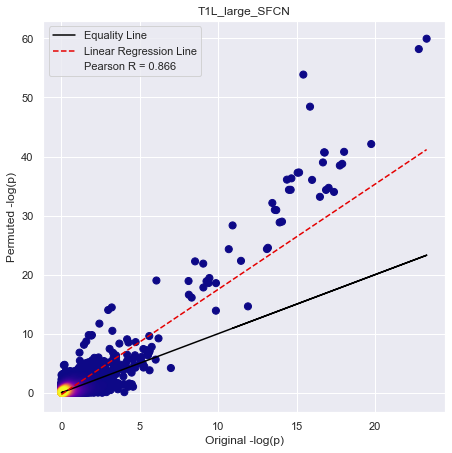

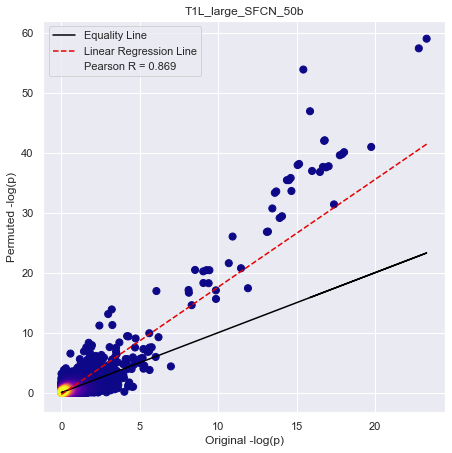

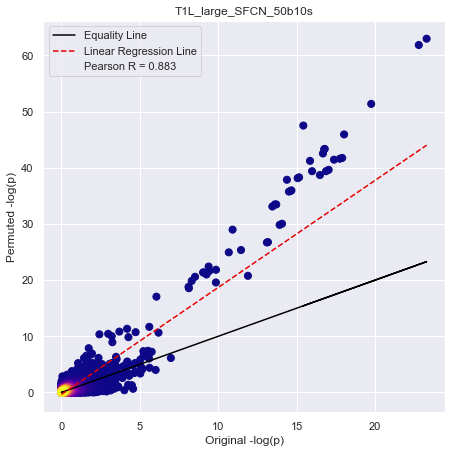

In [16]:
dfA = vars_df_A.iloc[0].dataframe.log_p_values.values

for idx in range(len(vars_df_B)):
    
    dfB = vars_df_B.iloc[idx].dataframe.log_p_values.values
    modality = vars_df_B.iloc[idx].modality
    scatter_plot_heatmap(x=dfA, y=dfB, xlabel='Original -log(p)', ylabel='Permuted -log(p)', title=modality, 
                         equality_line=True, set_scale=False, kde=True, annotate=True, resolution_lim=False)

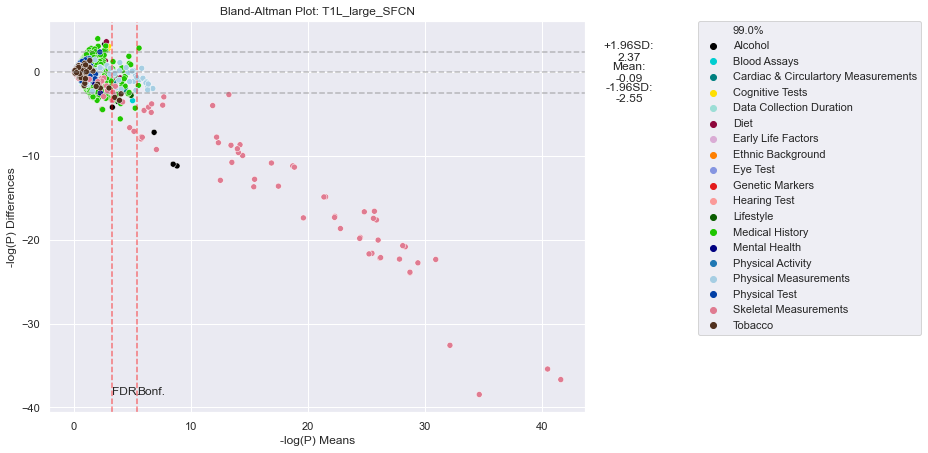

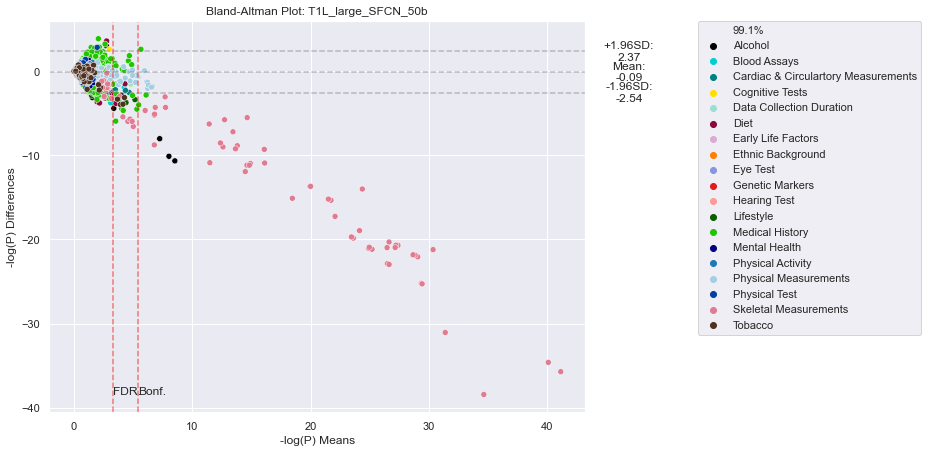

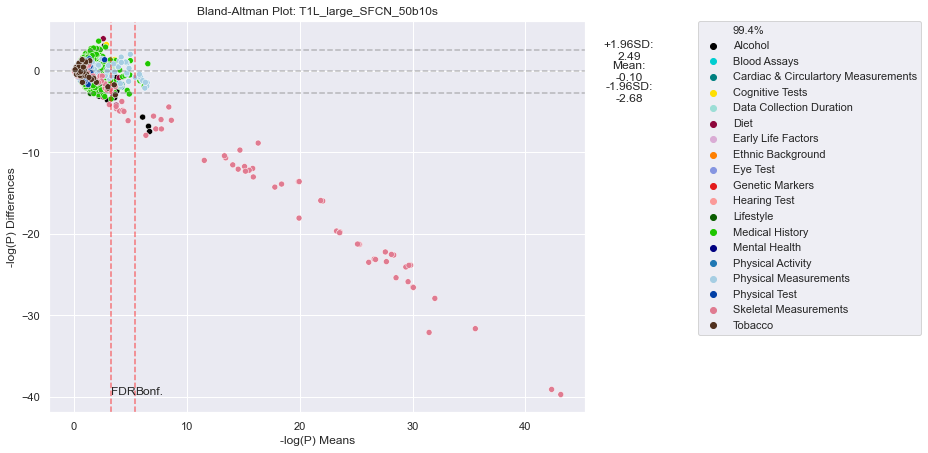

In [15]:
dfA = vars_df_A.iloc[0].dataframe

for idx in range(len(vars_df_B)):
    dfB = vars_df_B.iloc[idx].dataframe
    modality = vars_df_B.iloc[idx].modality
    dfm = pd.merge(dfA, dfB, on='idx', how='inner')
    bonf = (vars_df_A.iloc[0].bonf + vars_df_B.iloc[idx].bonf) / 2
    fdr = (vars_df_A.iloc[0].fdr + vars_df_B.iloc[idx].fdr) / 2
    bland_altman_plot(dfm.sort_values('Categories_x'), modality = modality, metric='-log(P)',
                     bonf=bonf, fdr=fdr
                     )

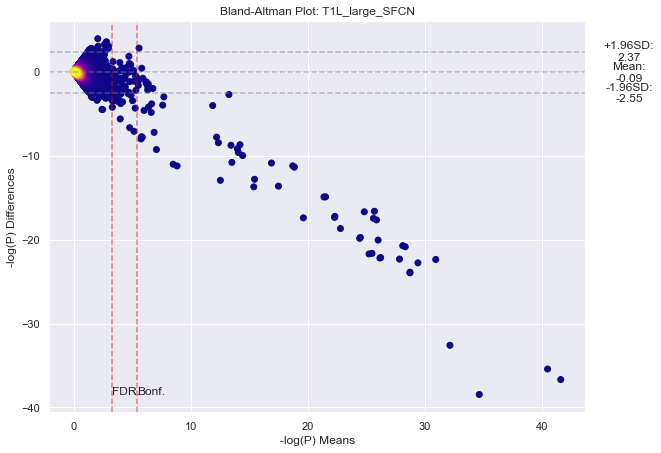

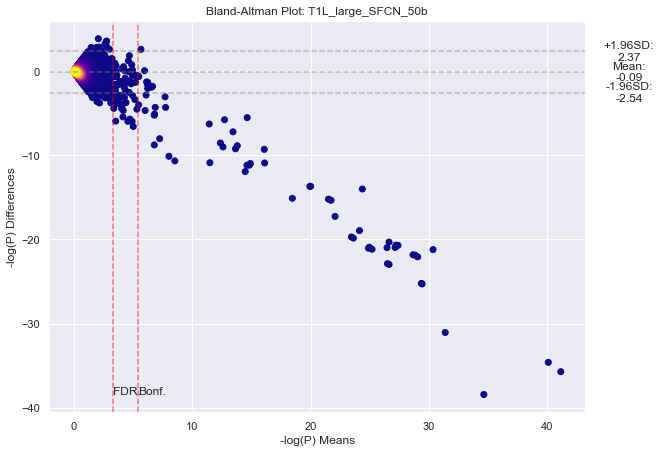

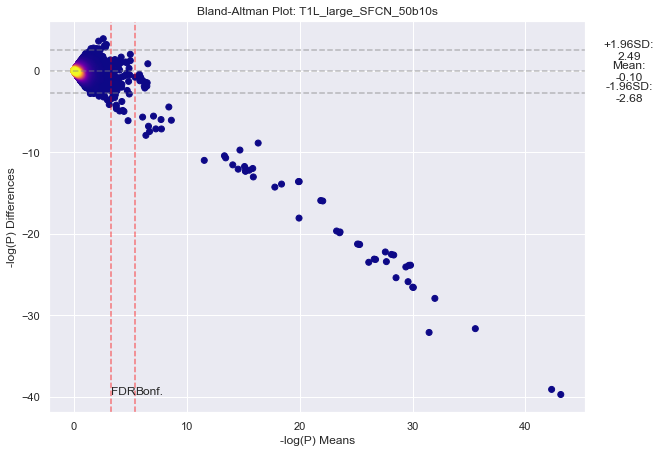

In [14]:
dfA = vars_df_A.iloc[0].dataframe

for idx in range(len(vars_df_B)):
    dfB = vars_df_B.iloc[idx].dataframe
    modality = vars_df_B.iloc[idx].modality
    dfm = pd.merge(dfA, dfB, on='idx', how='inner')
    bonf = (vars_df_A.iloc[0].bonf + vars_df_B.iloc[idx].bonf) / 2
    fdr = (vars_df_A.iloc[0].fdr + vars_df_B.iloc[idx].fdr) / 2
    bland_altman_plot(dfm.sort_values('Categories_x'), modality = modality, metric='-log(P)', heatmap=True,
                     bonf=bonf, fdr=fdr
                     )

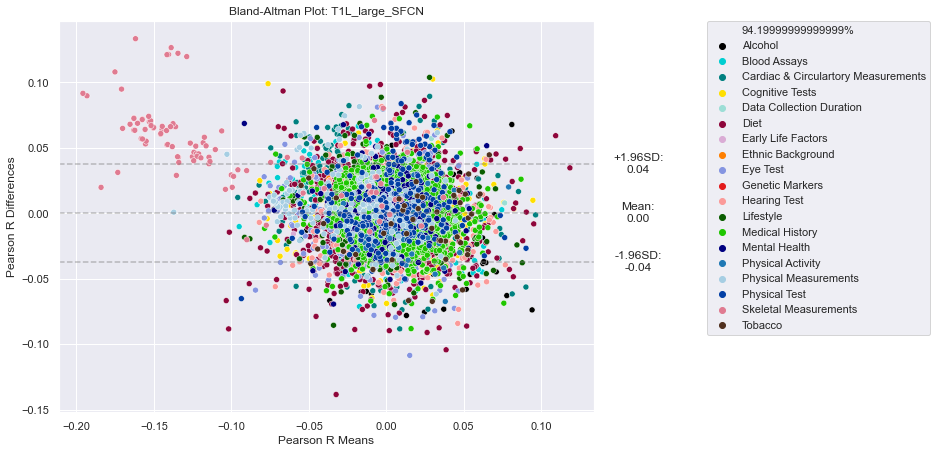

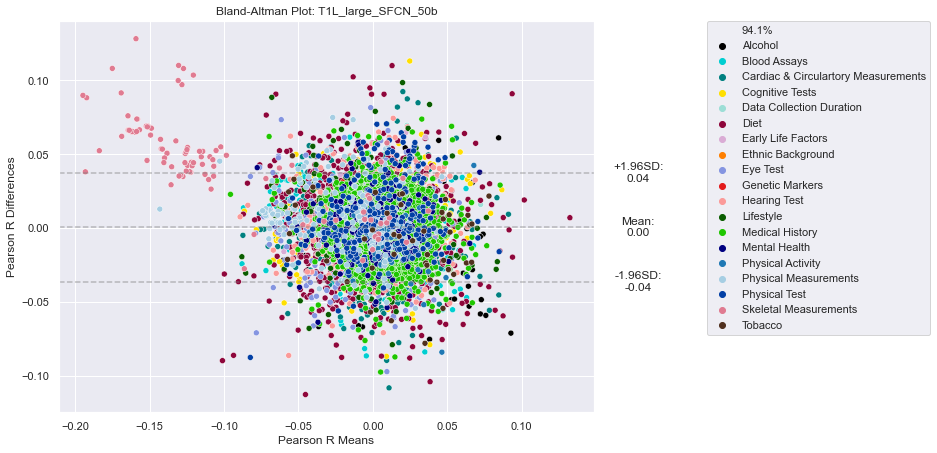

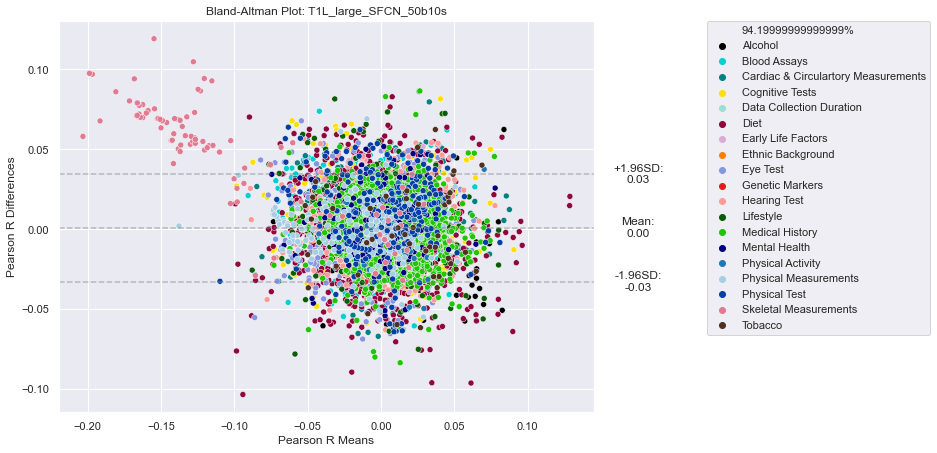

In [20]:
dfA = vars_df_A.iloc[0].dataframe

for idx in range(len(vars_df_B)):
    dfB = vars_df_B.iloc[idx].dataframe
    modality = vars_df_B.iloc[idx].modality
    dfm = pd.merge(dfA, dfB, on='idx', how='inner')
    bland_altman_plot(dfm.sort_values('Categories_x'), modality = modality, metric='Pearson R')

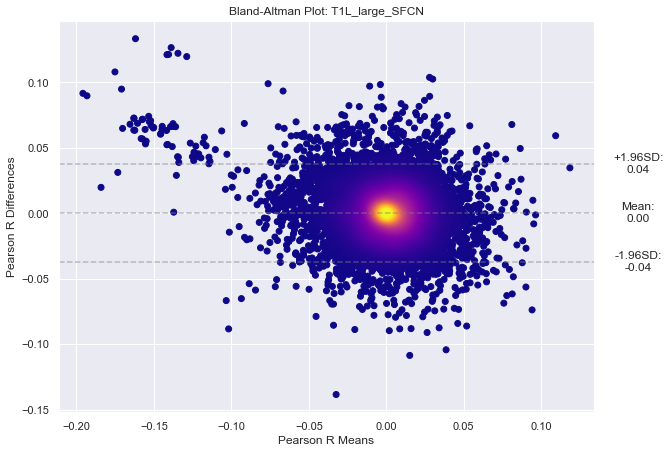

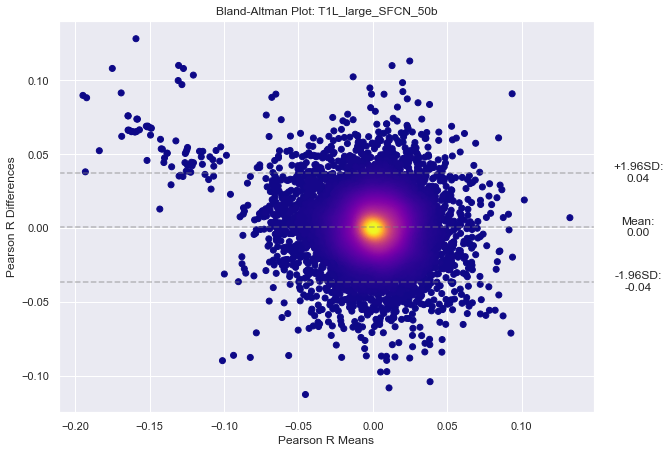

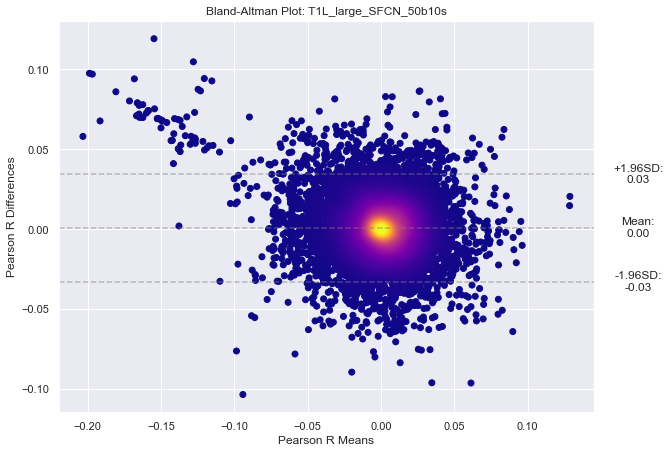

In [21]:
dfA = vars_df_A.iloc[0].dataframe

for idx in range(len(vars_df_B)):
    dfB = vars_df_B.iloc[idx].dataframe
    modality = vars_df_B.iloc[idx].modality
    dfm = pd.merge(dfA, dfB, on='idx', how='inner')
    bland_altman_plot(dfm.sort_values('Categories_x'), modality = modality, metric='Pearson R', heatmap=True)

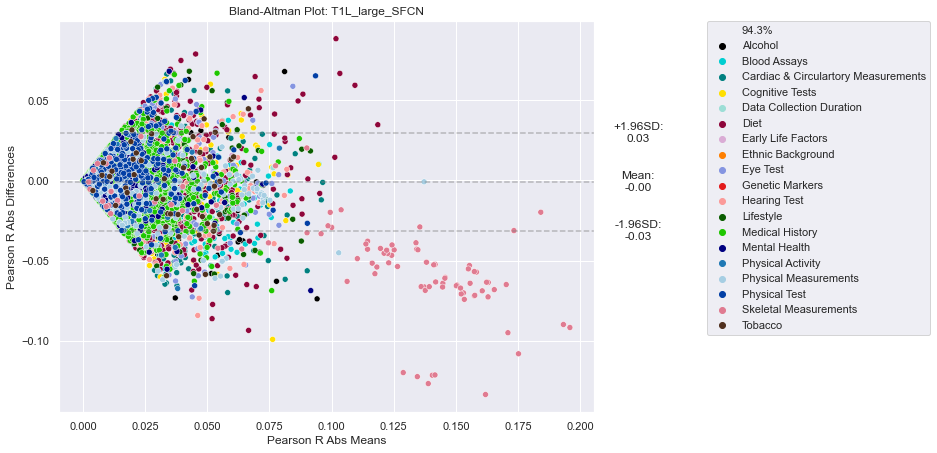

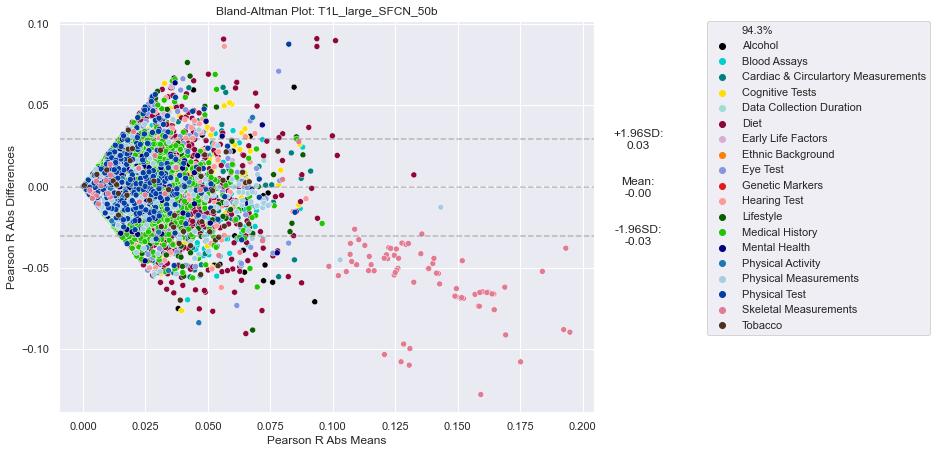

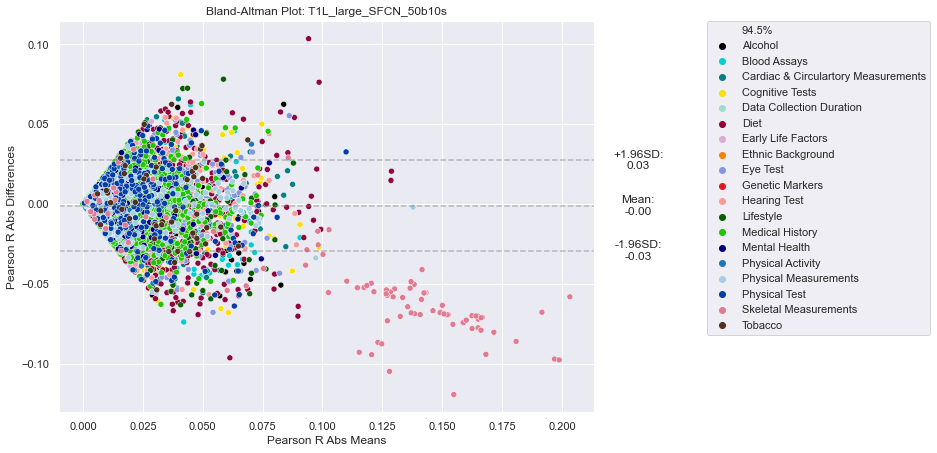

In [22]:
dfA = vars_df_A.iloc[0].dataframe

for idx in range(len(vars_df_B)):
    
    dfB = vars_df_B.iloc[idx].dataframe
    modality = vars_df_B.iloc[idx].modality
    dfm = pd.merge(dfA, dfB, on='idx', how='inner')
    bland_altman_plot(dfm.sort_values('Categories_x'), modality = modality, metric='Pearson R Abs')

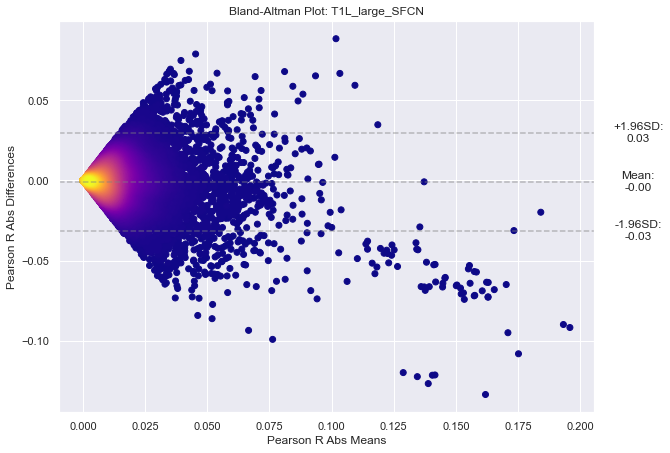

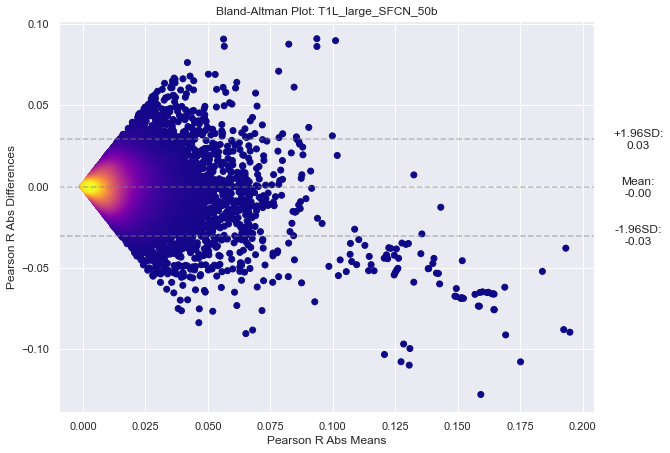

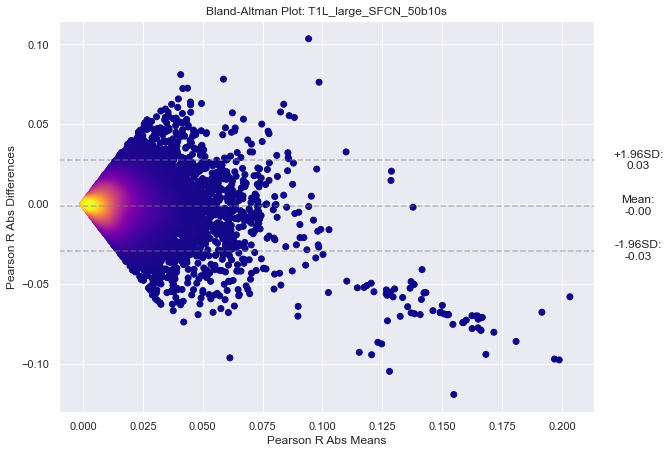

In [23]:
dfA = vars_df_A.iloc[0].dataframe
for idx in range(len(vars_df_B)):
    
    dfB = vars_df_B.iloc[idx].dataframe
    modality = vars_df_B.iloc[idx].modality
    dfm = pd.merge(dfA, dfB, on='idx', how='inner')
    bland_altman_plot(dfm.sort_values('Categories_x'), modality = modality, metric='Pearson R Abs', heatmap=True)

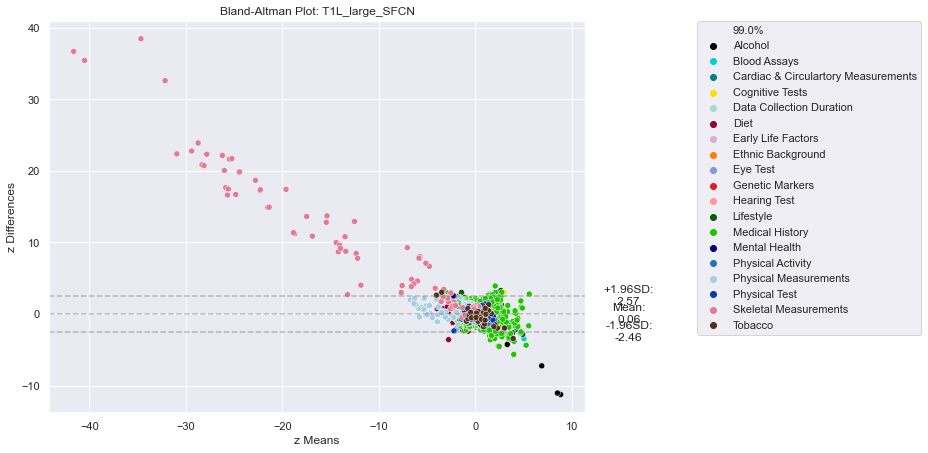

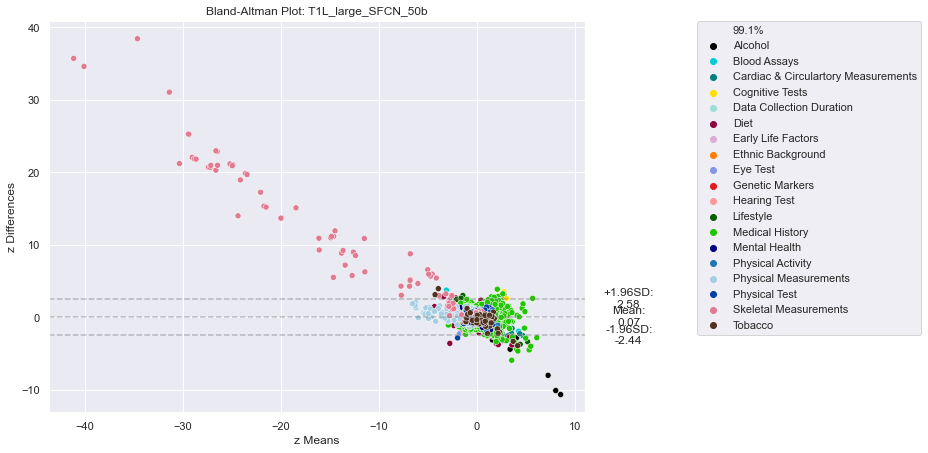

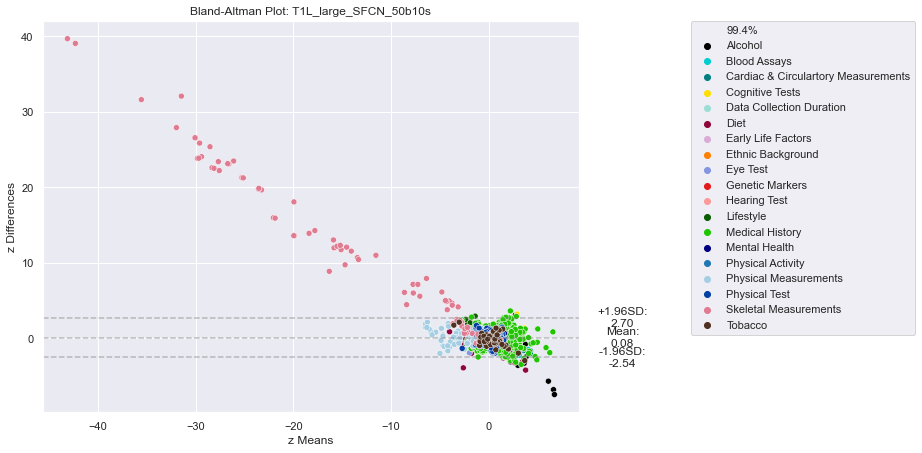

In [55]:
dfA = vars_df_A.iloc[0].dataframe

for idx in range(len(vars_df_B)):
    dfB = vars_df_B.iloc[idx].dataframe
    modality = vars_df_B.iloc[idx].modality
    dfm = pd.merge(dfA, dfB, on='idx', how='inner')
    bland_altman_plot(dfm.sort_values('Categories_x'), modality = modality, metric='z',
                     )

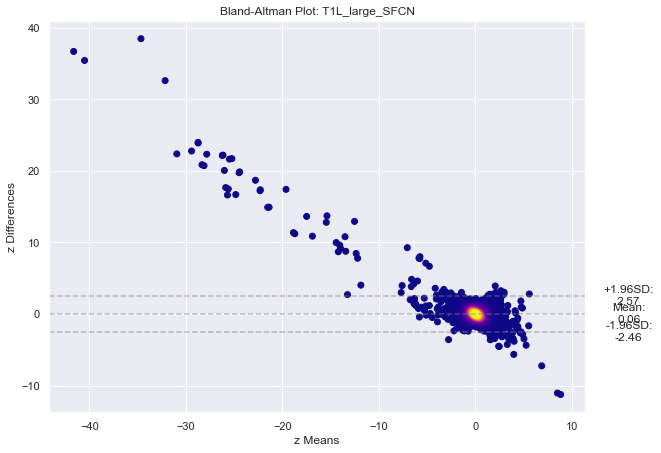

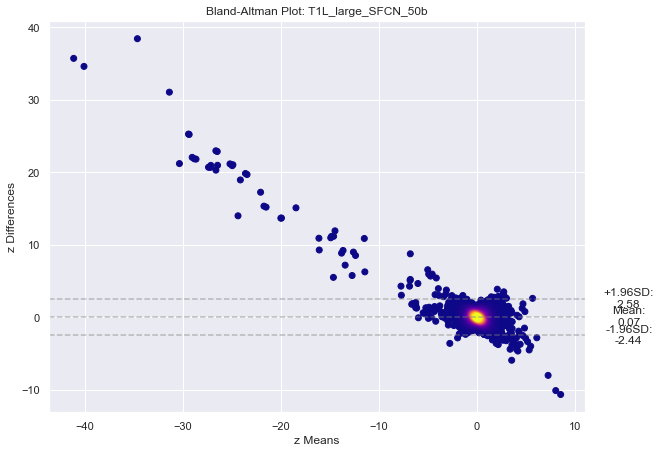

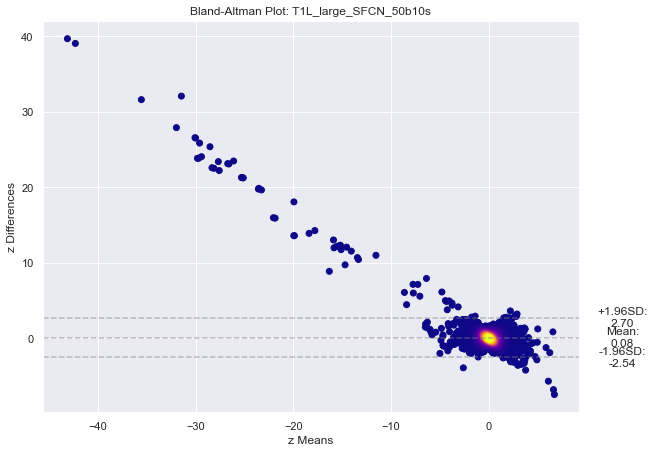

In [56]:
dfA = vars_df_A.iloc[0].dataframe

for idx in range(len(vars_df_B)):
    dfB = vars_df_B.iloc[idx].dataframe
    modality = vars_df_B.iloc[idx].modality
    dfm = pd.merge(dfA, dfB, on='idx', how='inner')
    bland_altman_plot(dfm.sort_values('Categories_x'), modality = modality, metric='z', heatmap=True,
                     )

In [25]:
def bland_altman_plot_old(data1, data2, modality, metric, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd

    colorCycle=['#000000', '#00CED1','#008080','#ffdf00','#9cded6','#8e063b','#DAACD5','#ff7f00','#8595e1','#e31a1c','#fb9a99','#0a5d00','#1fc600','#000080','#1f78b4','#a6cee3', '#023fa5', '#e07b91', '#50301e']
        
    plt.scatter(mean, diff, *args, **kwargs)
#     sns.scatterplot(x=mean, y=diff, )
    plt.axhline(md,           color='red', linestyle='--', alpha=0.5)
    plt.axhline(md + 1.96*sd, color='orange', linestyle='--', alpha=0.5)
    plt.axhline(md - 1.96*sd, color='orange', linestyle='--', alpha=0.5)
    
    xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.14
    
    plt.text(xOutPlot, md - 1.96*sd, 
        r'-1.96SD:' + "\n" + "%.2f" % CI_low, 
        ha = "center",
        va = "center",
        )
    plt.text(xOutPlot, md + 1.96*sd, 
        r'+1.96SD:' + "\n" + "%.2f" % CI_high, 
        ha = "center",
        va = "center",
        )
    plt.text(xOutPlot, md, 
        r'Mean:' + "\n" + "%.2f" % md, 
        ha = "center",
        va = "center",
        )
    
    title = 'Bland-Altman Plot: ' + modality
    xlabel = metric + ' Means'
    ylabel = metric + ' Differences'
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [26]:
# bland_altman_plot(dfm.log_p_values_x, dfm.log_p_values_y, modality = 'T1_Nonlinear', metric='-log(P)')

# Correlation Between C1 and C2

In [27]:
vars_df_A.head()

,modality,bonf,fdr,dataframe
0,T1L_large_HGL,5.441192,3.425256,idx ...


In [28]:
vars_df_A.iloc[0].dataframe.head()

,idx,names,Categories,pearson_r,t_test_statistic,p_values_corrected,p_values,abs_pearson_r,log_p_values,log_p_values_corrected
0,0,Ethnic background (0.0),Ethnic Background,-0.017822,1.261440,0.879211,0.207209,0.017822,0.683591,5.590694e-02
1,1,Ethnic background (1.0),Ethnic Background,-0.013354,0.386143,1.000000,0.699489,0.013354,0.155219,4.821637e-17
2,2,Ethnic background (2.0),Ethnic Background,-0.023751,0.896215,0.970520,0.370290,0.023751,0.431459,1.299556e-02
3,3,Genotype measurement batch (0.0),Genetic Markers,-0.004550,0.317799,1.000000,0.750651,0.004550,0.124562,4.821637e-17
4,4,Heterozygosity (0.0),Genetic Markers,-0.008424,0.588403,1.000000,0.556289,0.008424,0.254699,4.821637e-17


In [29]:
dfm

,idx,names_x,Categories_x,pearson_r_x,t_test_statistic_x,p_values_corrected_x,p_values_x,abs_pearson_r_x,log_p_values_x,log_p_values_corrected_x,names_y,Categories_y,pearson_r_y,t_test_statistic_y,p_values_corrected_y,p_values_y,abs_pearson_r_y,log_p_values_y,log_p_values_corrected_y
0,0,Ethnic background (0.0),Ethnic Background,-0.017822,1.261440,0.879211,0.207209,0.017822,0.683591,5.590694e-02,Ethnic background (0.0),Ethnic Background,-0.011942,0.845128,0.956317,0.398080,0.011942,0.400030,1.939819e-02
1,1,Ethnic background (1.0),Ethnic Background,-0.013354,0.386143,1.000000,0.699489,0.013354,0.155219,4.821637e-17,Ethnic background (1.0),Ethnic Background,-0.000097,0.002808,1.000000,0.997760,0.000097,0.000974,9.643275e-17
2,2,Ethnic background (2.0),Ethnic Background,-0.023751,0.896215,0.970520,0.370290,0.023751,0.431459,1.299556e-02,Ethnic background (2.0),Ethnic Background,-0.050164,1.894713,0.631840,0.058333,0.050164,1.234086,1.993932e-01
3,3,Genotype measurement batch (0.0),Genetic Markers,-0.004550,0.317799,1.000000,0.750651,0.004550,0.124562,4.821637e-17,Genotype measurement batch (0.0),Genetic Markers,-0.027375,1.912690,0.624908,0.055846,0.027375,1.253006,2.041841e-01
4,4,Heterozygosity (0.0),Genetic Markers,-0.008424,0.588403,1.000000,0.556289,0.008424,0.254699,4.821637e-17,Heterozygosity (0.0),Genetic Markers,-0.012265,0.856699,0.956317,0.391653,0.012265,0.407098,1.939819e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13804,17507,Manifestations of mania or irritability (0.1),Mental Health,-0.003324,0.084152,1.000000,0.932962,0.003324,0.030136,4.821637e-17,Manifestations of mania or irritability (0.1),Mental Health,-0.010550,0.267115,1.000000,0.789466,0.010550,0.102666,9.643275e-17
13805,17514,Substances taken for anxiety (0.1),Mental Health,-0.004316,0.113373,1.000000,0.909768,0.004316,0.041069,4.821637e-17,Substances taken for anxiety (0.1),Mental Health,0.015327,0.402655,1.000000,0.687327,0.015327,0.162837,9.643275e-17
13806,17516,Activities undertaken to treat anxiety (0.1),Mental Health,-0.068728,1.780529,0.739522,0.075444,0.068728,1.122376,1.310486e-01,Activities undertaken to treat anxiety (0.1),Mental Health,-0.025352,0.655440,0.982653,0.512410,0.025352,0.290382,7.599848e-03
13807,17525,Ever been offered/sought treatment for anxiety...,Mental Health,0.005244,0.331269,1.000000,0.740459,0.005244,0.130499,4.821637e-17,Ever been offered/sought treatment for anxiety...,Mental Health,0.005283,0.333718,1.000000,0.738610,0.005283,0.131585,9.643275e-17


In [34]:
# def get_corr_plot(array, title, labels, partial_correlation=False, fig_size=None, fix_colorbar_scale=False):
#     with sns.axes_style("white"):
#         if fig_size == None:
#             fig = plt.figure() # can set figsize=(fig_size = 12.8, fig_size)
#         else:
#             fig = plt.figure(figsize=(fig_size, fig_size))
#         ax = fig.add_subplot(111)
#         if fix_colorbar_scale == True:
#             cax = ax.matshow(array, interpolation='nearest',cmap='viridis', vmin=0, vmax=1)
#         else:
#             cax = ax.matshow(array, interpolation='nearest',cmap='viridis')
#         fig.colorbar(cax)
#         if partial_correlation == False:
#             intro = "Pearson R"
#         else:
#             intro = "Partial Correlation"
#         plt.title("{} for {}".format(intro, title), fontsize=fig_size+5 if fig_size != None else 10)
#         ax.set_yticks(np.arange(len(labels)))
#         ax.set_yticklabels(labels)
#         ax.xaxis.set_ticks_position("bottom")
#         ax.set_xticks(np.arange(len(labels)))
#         ax.set_xticklabels(labels, rotation=90)
        
#         linewidth = 3.5
#         linestyle = 'dotted'
        
# #         plt.axvline(x=6.5, color='r', linestyle=linestyle, linewidth=linewidth);
# #         plt.axvline(x=31.5, color='r', linestyle=linestyle, linewidth=linewidth);
# #         plt.axvline(x=37.5, color='r', linestyle=linestyle, linewidth=linewidth);
# #         plt.axvline(x=38.5, color='r', linestyle=linestyle, linewidth=linewidth);
# #         plt.axvline(x=47.5, color='r', linestyle=linestyle, linewidth=linewidth);
        
# #         plt.axhline(y=6.5, color='r', linestyle=linestyle, linewidth=linewidth);
# #         plt.axhline(y=31.5, color='r', linestyle=linestyle, linewidth=linewidth);
# #         plt.axhline(y=37.5, color='r', linestyle=linestyle, linewidth=linewidth);
# #         plt.axhline(y=38.5, color='r', linestyle=linestyle, linewidth=linewidth);
# #         plt.axhline(y=47.5, color='r', linestyle=linestyle, linewidth=linewidth);
        
#         plt.show()

# def correlation_plot(dfA, dfB, key, title, partial_correlation= False, fig_size=None, fix_colorbar_scale=False):
    
#     names = dfA.modality.to_list()
    
#     corr_df1 = []
#     for idx1 in range(len(dfA)):
#         df1 = dfA.iloc[idx1].dataframe
#         corr_df2 = []
#         for idx2 in range(len(dfB)):
#             df2 = dfB.iloc[idx2].dataframe
#             dfm = pd.merge(df1, df2, on='idx', how='inner')
#             key1 = key+'_x'
#             key2 = key+'_y'
#             r, _ = pearsonr(dfm[key1], dfm[key2])
#             corr_df2.append(r)
#         corr_df2 = np.array(corr_df2).astype('float32')
#         corr_df1.append(corr_df2)
#     corr_df1 = np.array(corr_df1).astype('float32')
#     get_corr_plot(corr_df1, labels=names, partial_correlation=partial_correlation,
#                   title=title, fig_size=fig_size, fix_colorbar_scale=fix_colorbar_scale) 

#     return corr_df1

In [35]:
# corr_df_lp = correlation_plot(vars_df_A, vars_df_B, key='log_p_values', 
#                  title='Test C1 vs C2 for -log(p)', partial_correlation= False, fig_size=20, fix_colorbar_scale=False)

In [36]:
# corr_df_pr = correlation_plot(vars_df_A, vars_df_B, key='pearson_r', 
#                  title='Test C1 vs C2 for Pr', partial_correlation= False, fig_size=20, fix_colorbar_scale=False)

In [37]:
# corr_df_apr = correlation_plot(vars_df_A, vars_df_B, key='abs_pearson_r', 
#                  title='Test C1 vs C2 for abs(Pr)', partial_correlation= False, fig_size=20, fix_colorbar_scale=False)

In [38]:
df1 = vars_df_A.iloc[0].dataframe
df2 = vars_df_B.iloc[0].dataframe
dfm = pd.merge(df1, df2, on='idx', how='inner')
key='pearson_r'
key1 = key+'_x'
key2 = key+'_y'
r, _ = pearsonr(dfm[key1], dfm[key2])
print(r)

0.6933261822285973


In [39]:
def scatter_plot_heatmap(x, y, xlabel, ylabel, title, equality_line=True, set_scale=False):
    
    x = x.to_numpy()
    y = y.to_numpy()
    
    fig = plt.figure(figsize=[7.2, 7.2])
    sns.set_style("darkgrid", {'image.cmap': u'plasma'})
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    plt.scatter(x,y,c=z,s=50)
    if equality_line == True:
        plt.plot(x, x, ls="-", color = sns.xkcd_rgb['black'], label='Equality Line') #this is just the line of equality
    
    X_mat=np.vstack((np.ones(len(x)), x)).T
    beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)
    b,w = beta_hat[0],beta_hat[1]
    x2 = np.linspace(np.min(x),np.max(x),num=10)
    y2 = w * x2 + b
    plt.plot(x2,y2,ls='--', color= sns.xkcd_rgb['red'], label='Linear Regression Line')
    
    pearson_correlation = pearsonr(x,y)[0]
#     plt.text(np.max(x), np.min(y)+0.05*np.abs(np.min(y2)), 'R='+str(round(pearson_correlation,3)), horizontalalignment='right', fontsize='large')

    if set_scale == True:
        x_min, x_max = np.min(x), np.max(x)
        y_min, y_max = np.min(y), np.max(y)
        c_min, c_max = min(x_min, y_min), max(x_max, y_max)
        plt.xlim([c_min-2, c_max+2])
        plt.ylim([c_min-2, c_max+2])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    lbl = 'Pearson R = '+str(round(pearson_correlation,3))
    plt.plot([],[],' ',label=lbl)

    plt.title(title)
    plt.legend()
    plt.show()

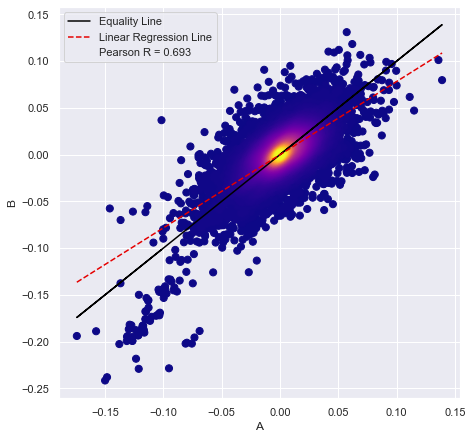

In [40]:
df1 = vars_df_A.iloc[0].dataframe
df2 = vars_df_B.iloc[0].dataframe
dfm = pd.merge(df1, df2, on='idx', how='inner')
key='pearson_r'
key1 = key+'_x'
key2 = key+'_y'

scatter_plot_heatmap(dfm[key1], dfm[key2],
                    xlabel='A', ylabel='B', title=None)

In [42]:
vars_df_A.iloc[0].modality

'T1L_large_HGL'

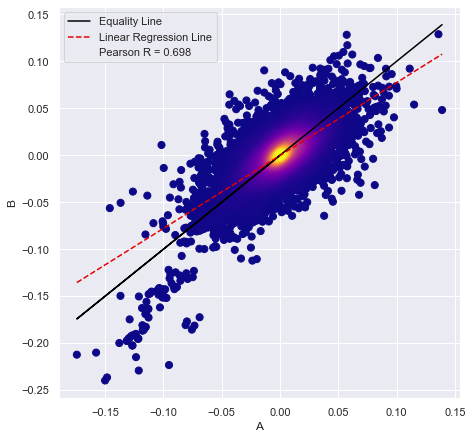

0.6982711820983196


In [43]:
df1 = vars_df_A.iloc[0].dataframe
df2 = vars_df_B.iloc[1].dataframe
dfm = pd.merge(df1, df2, on='idx', how='inner')
key='pearson_r'
key1 = key+'_x'
key2 = key+'_y'

scatter_plot_heatmap(dfm[key1], dfm[key2],
                    xlabel='A', ylabel='B', title=None)

r, _ = pearsonr(dfm[key1], dfm[key2])
print(r)

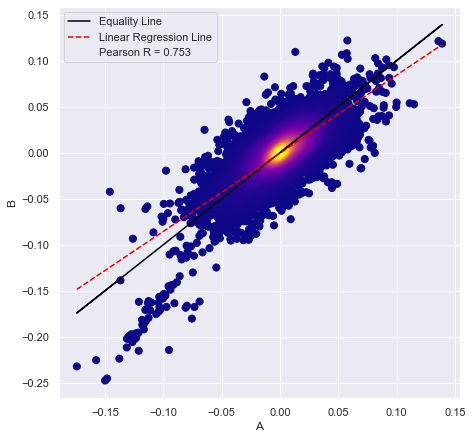

0.7529000478472057


In [44]:
df1 = vars_df_A.iloc[0].dataframe
df2 = vars_df_B.iloc[2].dataframe
dfm = pd.merge(df1, df2, on='idx', how='inner')
key='pearson_r'
key1 = key+'_x'
key2 = key+'_y'

scatter_plot_heatmap(dfm[key1], dfm[key2],
                    xlabel='A', ylabel='B', title=None)

r, _ = pearsonr(dfm[key1], dfm[key2])
print(r)

In [45]:
# for idx in range(len(vars_df_A)):
#     df1 = vars_df_A.iloc[idx].dataframe
#     df2 = vars_df_B.iloc[idx].dataframe
#     dfm = pd.merge(df1, df2, on='idx', how='inner')
#     key='pearson_r'
#     key1 = key+'_x'
#     key2 = key+'_y'
#     r, _ = pearsonr(dfm[key1], dfm[key2])
    
#     str_title = vars_df_A.iloc[idx].modality + ' ' + str(np.round(r, 2))
# #     print(str_title)
    
#     scatter_plot_heatmap(dfm[key1], dfm[key2],
#                         xlabel='C1', ylabel='C2', title=str_title)


# Bland Altman Plots of Different C2 Modalities

In [46]:
# dfA = vars_df_B.iloc[0].dataframe
# for idx in np.arange(47,56,1):
#     dfB = vars_df_B.iloc[idx].dataframe
#     modality = vars_df_B.iloc[idx].modality
#     dfm = pd.merge(dfA, dfB, on='idx', how='inner')
#     bland_altman_plot(dfm.sort_values('Categories_x'), modality = modality, metric='-log(P)')

In [ ]:
# f,a = plt.subplots(8,8, figsize=(30,30))
# a = a.ravel()

# i = 0

# for idx,ax in enumerate(a):
#     if idx < 57:
#         dfB = vars_df_B.iloc[idx].dataframe
#         modality = vars_df_B.iloc[idx].modality
#         ax.hist(vars_df_B.iloc[idx].dataframe.pearson_r);
#         ax.set_yscale('log')
#         ax.set_title(modality)
#         ax.set_xlim(left=-0.4, right=0.3)
#     else:
#         i+=1
# #     plt.savefig(modality + '.png', format='png')